In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

import warnings
warnings.filterwarnings("ignore")

In [13]:
# M31
m31_oid = np.memmap('../data/oid_m31.dat', mode='r', dtype=np.uint64)
m31_names = open('../data/feature_m31.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
m31_dtype = [(name, np.float32) for name in m31_names]
m31_x = np.memmap('../data/feature_m31.dat', mode='r', dtype=m31_dtype, shape=m31_oid.shape)


# Disk
disk_oid = np.memmap('../data/oid_disk.dat', mode='r', dtype=np.uint64)
disk_names = open('../data/feature_disk.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
disk_dtype = [(name, np.float32) for name in disk_names]
disk_x = np.memmap('../data/feature_disk.dat', mode='r', dtype=disk_dtype, shape=disk_oid.shape)


# Deep
deep_oid = np.memmap('../data/oid_deep.dat', mode='r', dtype=np.uint64)
deep_names = open('../data/feature_deep.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
deep_dtype = [(name, np.float32) for name in deep_names]
deep_x = np.memmap('../data/feature_deep.dat', mode='r', dtype=deep_dtype, shape=deep_oid.shape)

In [2]:
m31_anom_tab = pd.read_csv('../data/m31_anomalies_table.csv', index_col='oid')
disk_anom_tab = pd.read_csv('../data/disk_anomalies_table.csv', index_col='oid')
deep_anom_tab = pd.read_csv('../data/deep_anomalies_table.csv', index_col='oid')

In [35]:
deep_anom_tab

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
oid,,,,,,,,,,,,,,,,,,,,,
795203200009604,1.943000,0.368020,0.032995,0.290370,0.769578,388703260,1.351000,2.470800,-0.631400,-0.007297,...,0.113083,0.028044,0.719319,1.834713,77.674090,617.817100,-0.430643,0.906781,0.896606,17.796665
795205400022890,1.443500,0.173913,0.074534,0.368581,0.053191,4966888,0.582750,2.100601,0.673274,0.007732,...,0.101203,0.057815,0.713023,1.674084,64.805275,3962.892600,-1.378816,0.743432,0.744812,14.049537
795206400033919,2.292000,0.313043,0.060870,0.261737,1.085244,336588300,1.058500,1.896999,0.537647,0.006707,...,0.146361,0.056470,0.970831,1.397647,16.589664,865.153000,0.000233,0.754175,0.768493,17.511314
795209300012791,0.551000,0.275610,0.065854,0.053419,0.717117,53088930,0.484001,0.813999,-0.523882,-0.000030,...,0.095813,0.017076,0.675475,2.875488,138.731840,798.702760,-0.917594,0.320493,0.857033,15.882313
795215300016556,2.093000,0.194444,0.037037,0.196048,1.349862,423755140,0.623501,1.262100,6.614486,-0.009735,...,0.171377,0.032179,1.176904,1.002925,4.685466,1273.586800,-1.982914,0.629839,0.691001,17.662052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795214300016648,1.579500,0.030303,0.008264,0.095613,0.984097,1424197900,0.102999,0.202999,124.642740,-0.008335,...,0.179766,0.056682,0.781076,0.641176,4.981922,168.364620,-10.254572,0.219661,0.437775,19.152811
795213400017653,2.041000,0.196262,0.074766,0.091098,1.959630,4175369200,0.632000,1.747101,2.496296,0.005148,...,0.164008,0.043965,0.753192,0.879957,10.891169,218.697040,-1.694176,0.729074,0.775311,18.631214
795206200012008,0.404000,0.004938,0.002469,0.058990,1.950318,87307890000,0.014999,0.033000,327.304050,0.000067,...,0.139864,0.014618,0.429548,0.369878,3.613221,11.643482,17.172035,0.040555,0.314884,15.536416


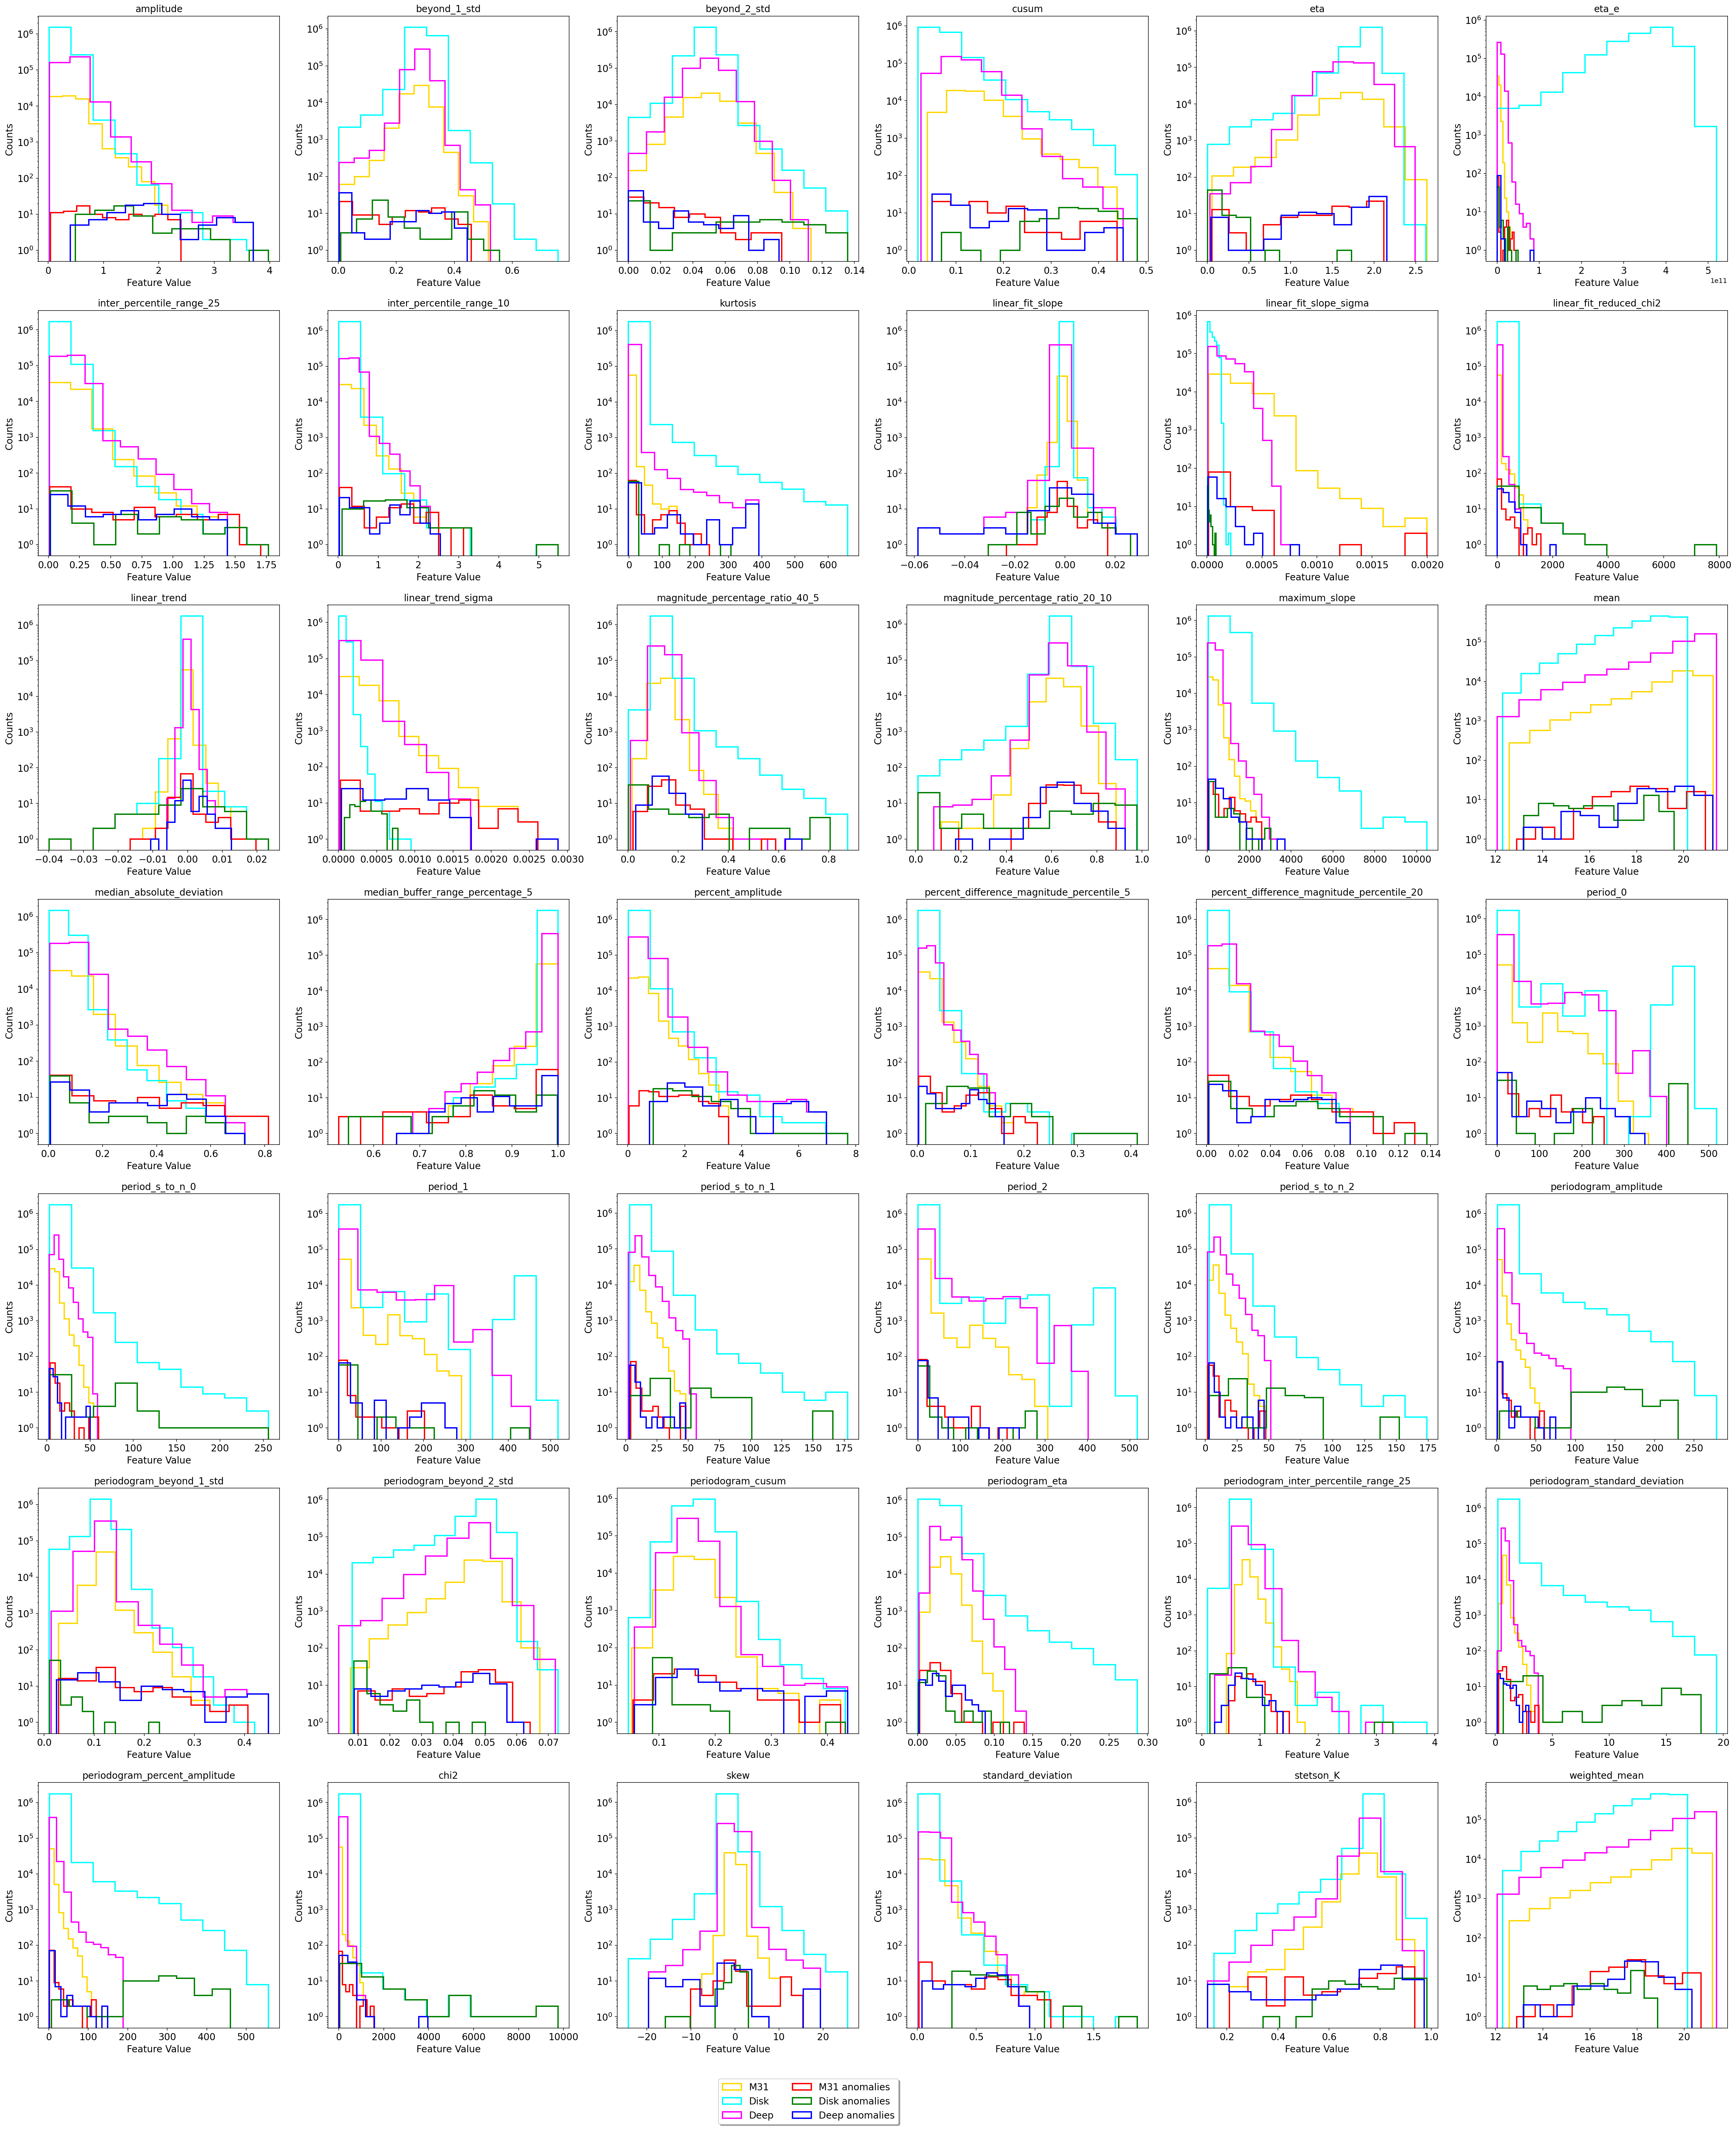

In [32]:
fig = plt.figure(figsize=(45, 55))

for i, f in enumerate(m31_names):
    ax = fig.add_subplot(7, 6, i+1) #42 features

    plt.hist(m31_x['{}'.format(f)], histtype='step', color='gold', linewidth=2, label='M31')
    plt.hist(disk_x['{}'.format(f)], histtype='step', color='cyan', linewidth=2, label='Disk')
    plt.hist(deep_x['{}'.format(f)], histtype='step', color='magenta', linewidth=2, label='Deep')
    plt.hist(m31_anom_tab['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 anomalies')
    plt.hist(disk_anom_tab['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk anomalies')
    plt.hist(deep_anom_tab['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep anomalies')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(-3.2, -0.3), ncol=2, fancybox=True, shadow=True, fontsize=14)

fig.tight_layout()
fig.savefig('../figs/histograms/all_features_histogram_with_anomalies.png', format='png', bbox_inches='tight', dpi=400)

# PLOT 3 MOST IMPORTANT FEATURES (MOST IMPORTANT FROM 1st THREE PRINCIPAL COMPONENT)

In [27]:
three_most_important_features = ['standard_deviation', 'periodogram_amplitude', 'chi2']

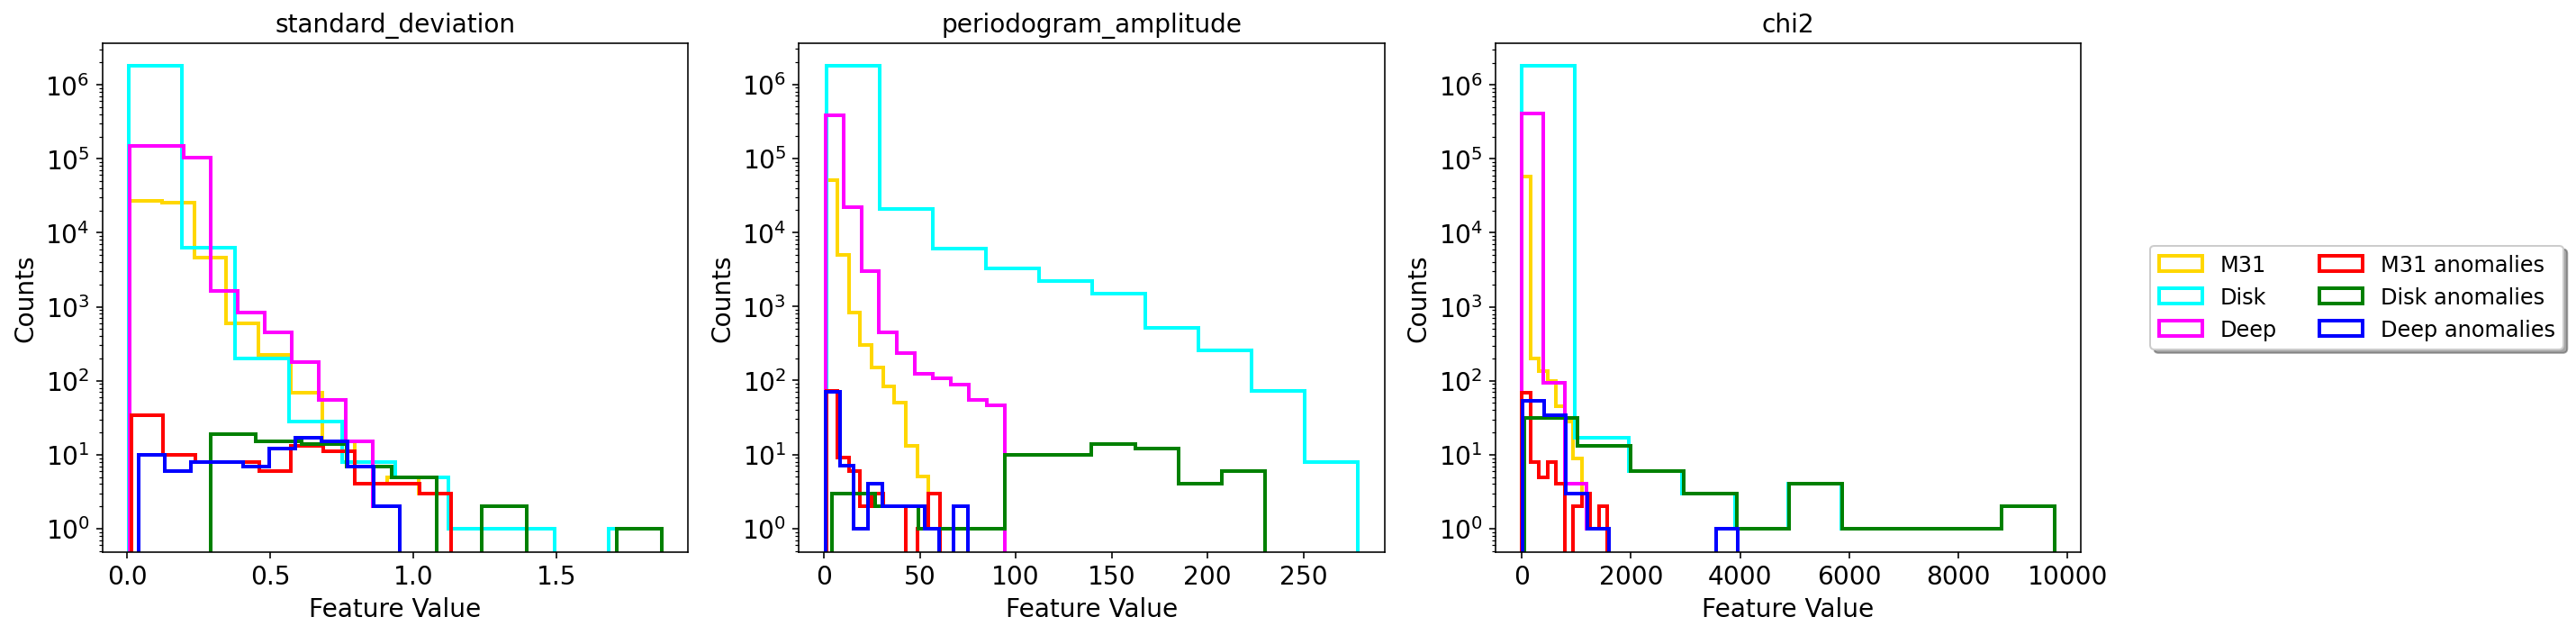

In [40]:
fig = plt.figure(figsize=(20, 5))

for i, f in enumerate(three_most_important_features):
    ax = fig.add_subplot(1, 3, i+1) #3 features

    plt.hist(m31_x['{}'.format(f)], histtype='step', color='gold', linewidth=2, label='M31')
    plt.hist(disk_x['{}'.format(f)], histtype='step', color='cyan', linewidth=2, label='Disk')
    plt.hist(deep_x['{}'.format(f)], histtype='step', color='magenta', linewidth=2, label='Deep')
    plt.hist(m31_anom_tab['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 anomalies')
    plt.hist(disk_anom_tab['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk anomalies')
    plt.hist(deep_anom_tab['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep anomalies')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=2, fancybox=True, shadow=True, fontsize=12)

fig.tight_layout()
fig.savefig('../figs/histograms/three_most_important_features.png', format='png', bbox_inches='tight', dpi=300)

# Plot artefacts and interesting objects of anomalies lists only

In [3]:
m31_maria_list = pd.read_csv('../data/m31_maria.csv')
m31_maria_list= m31_maria_list.set_index('oid')

disk_maria_list = pd.read_csv('../data/disk_maria.csv')
disk_maria_list= disk_maria_list.set_index('oid')

deep_maria_list = pd.read_csv('../data/deep_maria.csv')
deep_maria_list= deep_maria_list.set_index('oid')

In [4]:
m31_full_tab = pd.concat([m31_anom_tab, m31_maria_list], axis=1)
disk_full_tab = pd.concat([disk_anom_tab, disk_maria_list], axis=1)
deep_full_tab = pd.concat([deep_anom_tab, deep_maria_list], axis=1)

In [23]:
m31_artefacts = m31_full_tab[m31_full_tab.tag == 'artefact']
m31_interesting = m31_full_tab[m31_full_tab.tag != 'artefact']

disk_artefacts = disk_full_tab[disk_full_tab.tag == 'artefact']
disk_interesting = disk_full_tab[disk_full_tab.tag != 'artefact']

deep_artefacts = deep_full_tab[deep_full_tab.tag == 'artefact']
deep_interesting = deep_full_tab[deep_full_tab.tag != 'artefact']

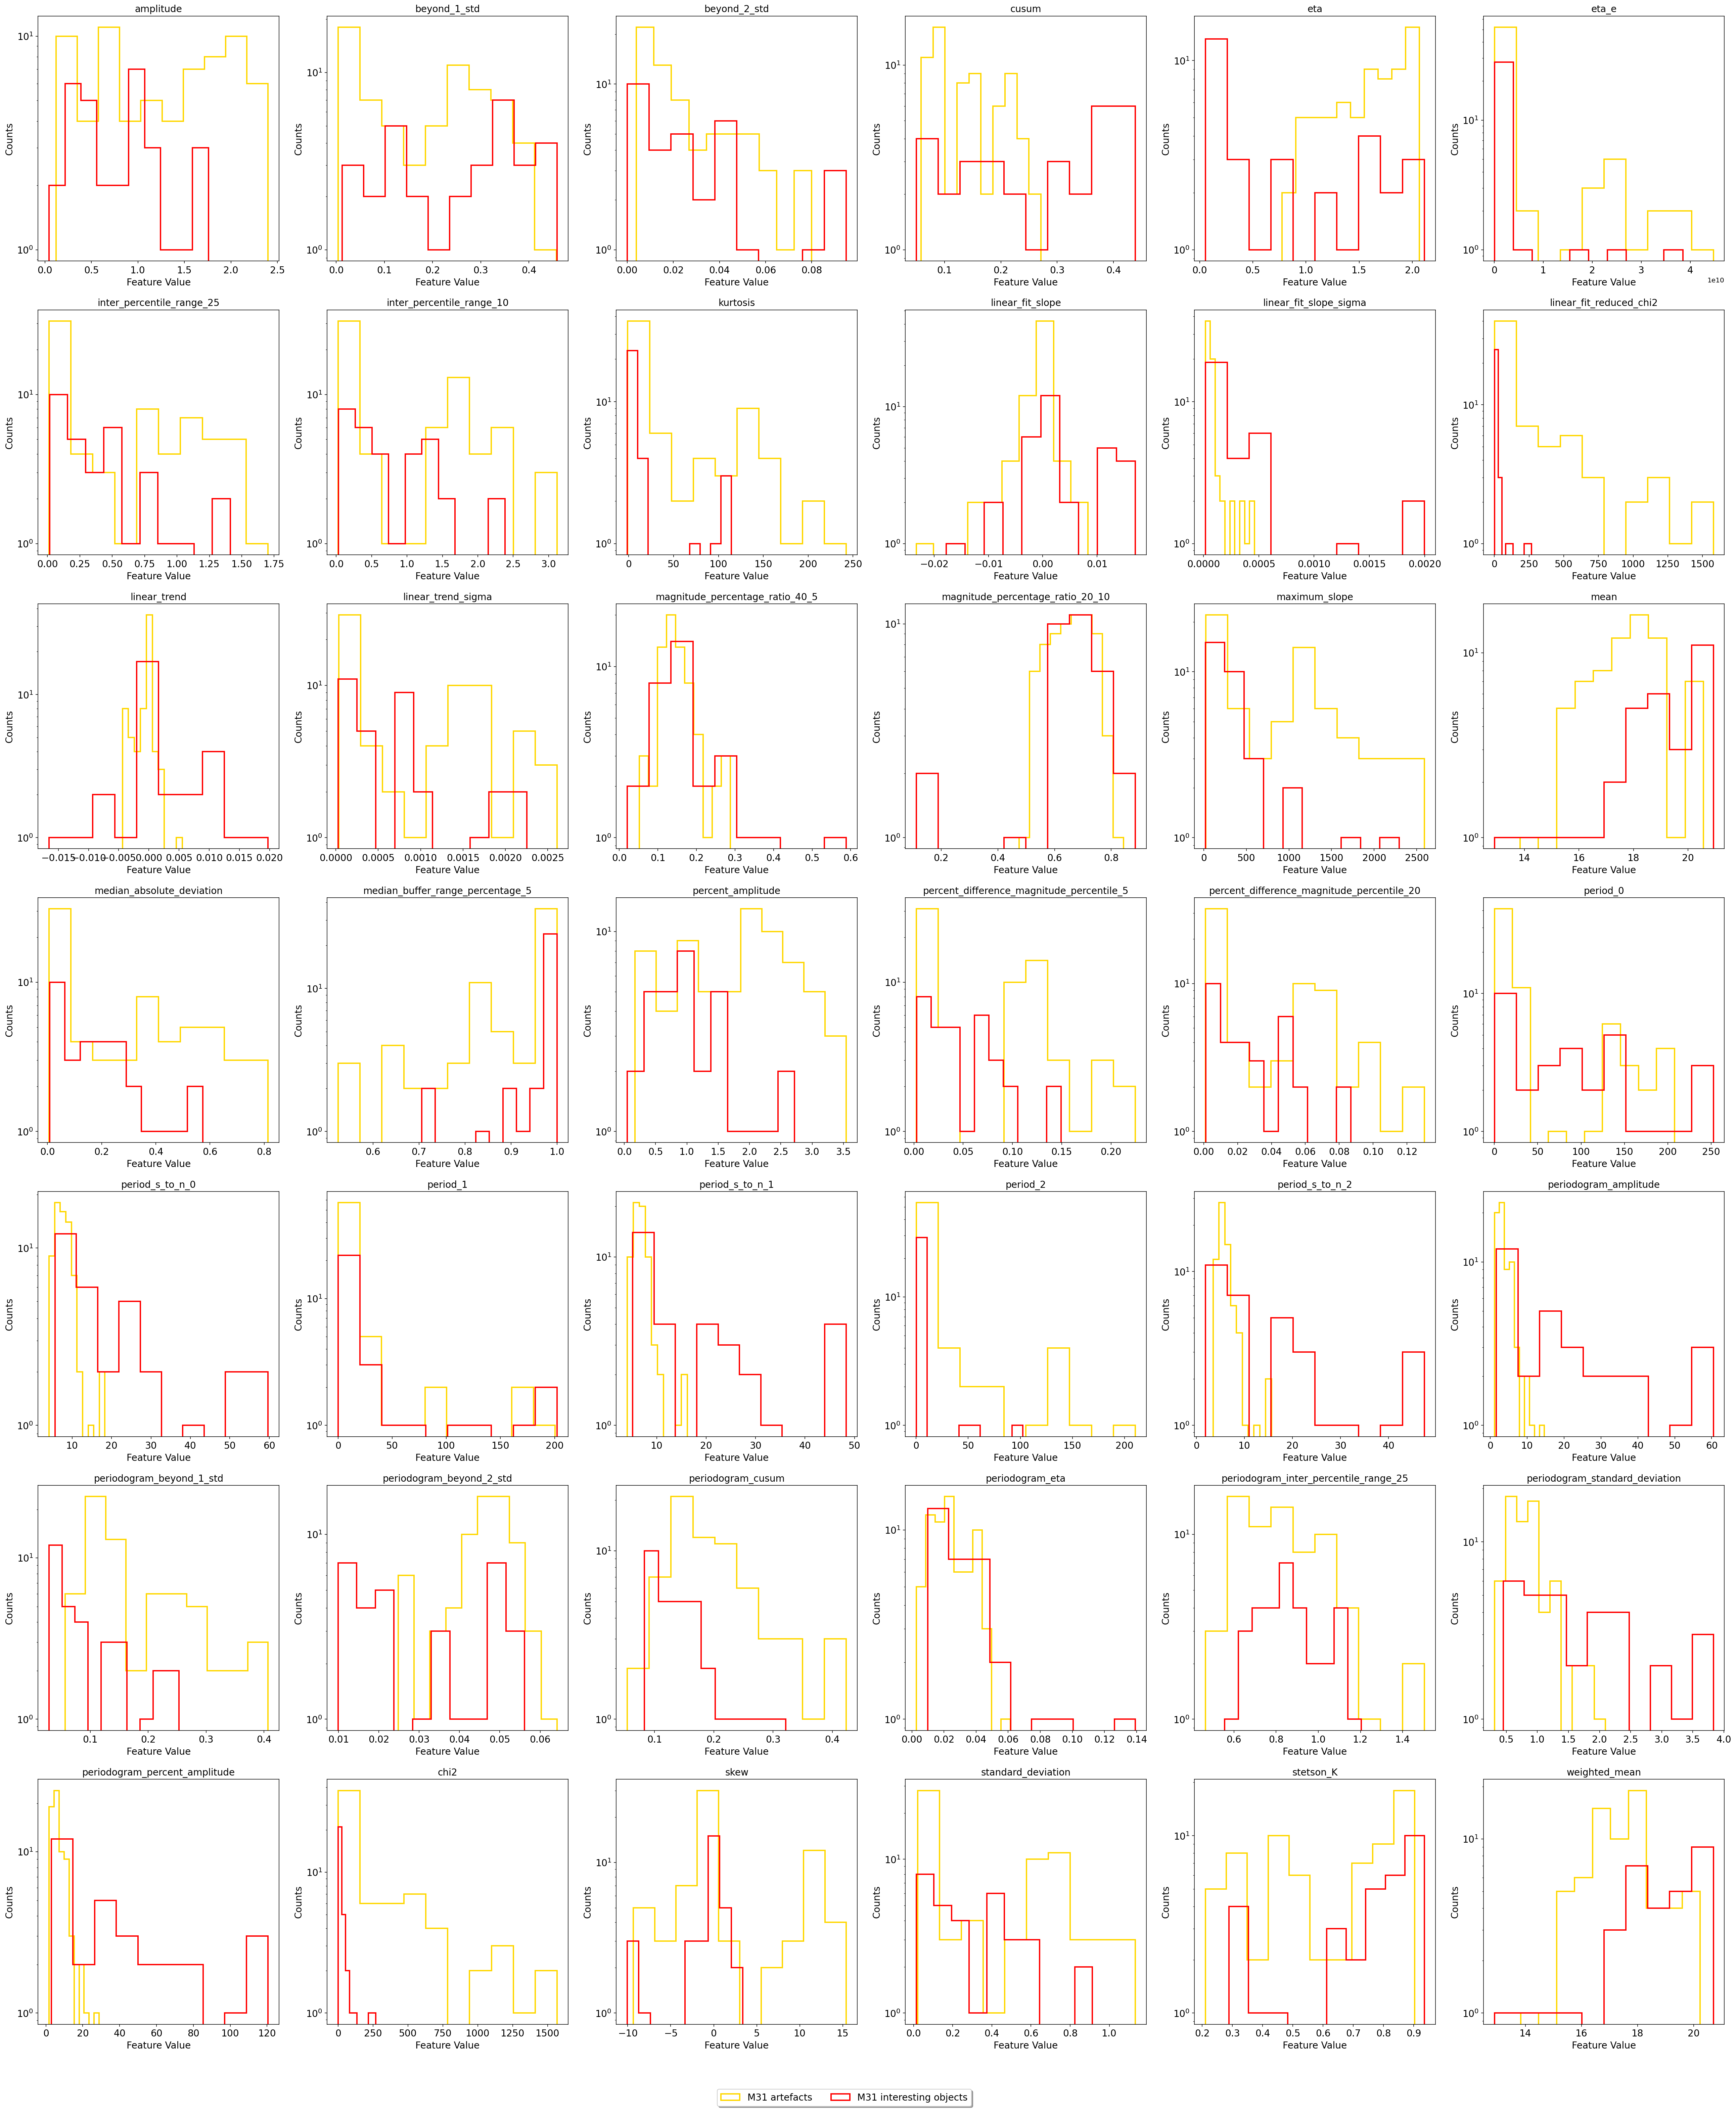

In [22]:
fig = plt.figure(figsize=(45, 55))

for i, f in enumerate(m31_names):
    ax = fig.add_subplot(7, 6, i+1) #42 features

    plt.hist(m31_artefacts['{}'.format(f)], histtype='step', color='gold', linewidth=2, label='M31 artefacts')
    plt.hist(m31_interesting['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 interesting objects')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(-3.2, -0.3), ncol=2, fancybox=True, shadow=True, fontsize=14)

fig.tight_layout()
#fig.savefig('../figs/histograms/m31_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=400)

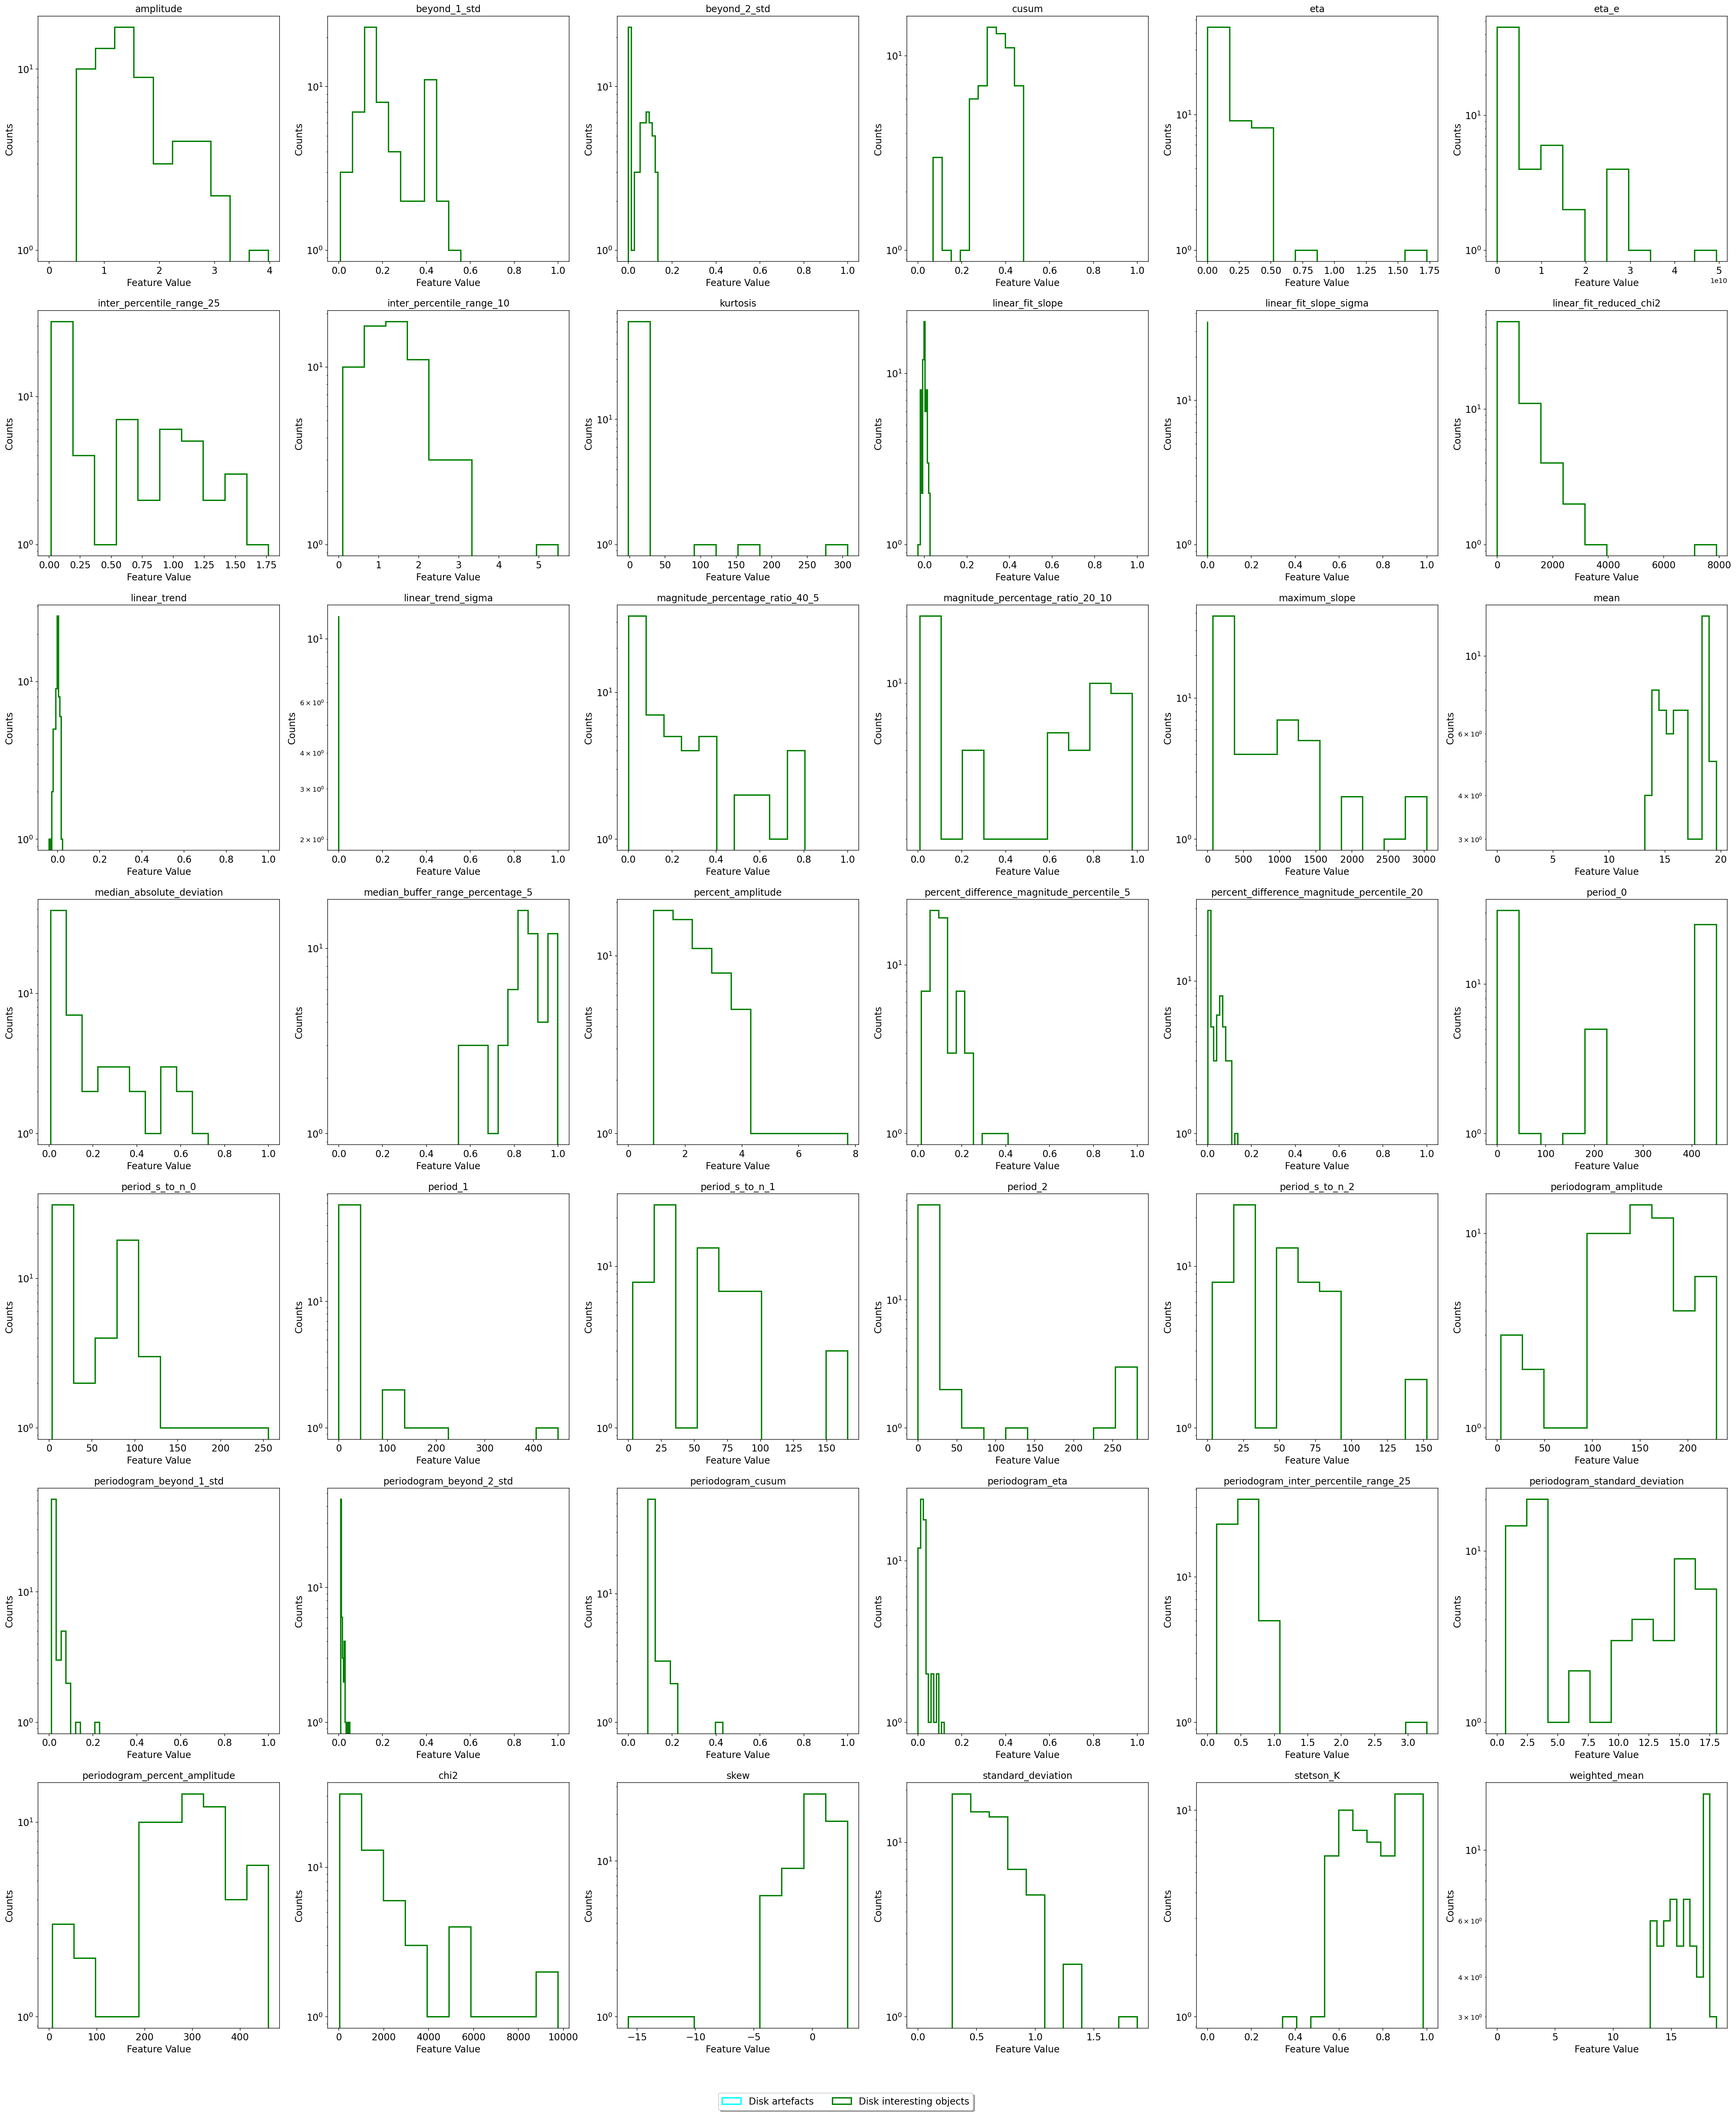

In [18]:
fig = plt.figure(figsize=(45, 55))

for i, f in enumerate(m31_names):
    ax = fig.add_subplot(7, 6, i+1) #42 features

    plt.hist(disk_artefacts['{}'.format(f)], histtype='step', color='cyan', linewidth=2, label='Disk artefacts')
    plt.hist(disk_interesting['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk interesting objects')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(-3.2, -0.3), ncol=2, fancybox=True, shadow=True, fontsize=14)

fig.tight_layout()
#fig.savefig('../figs/histograms/all_features_histogram_with_anomalies.png', format='png', bbox_inches='tight', dpi=400)

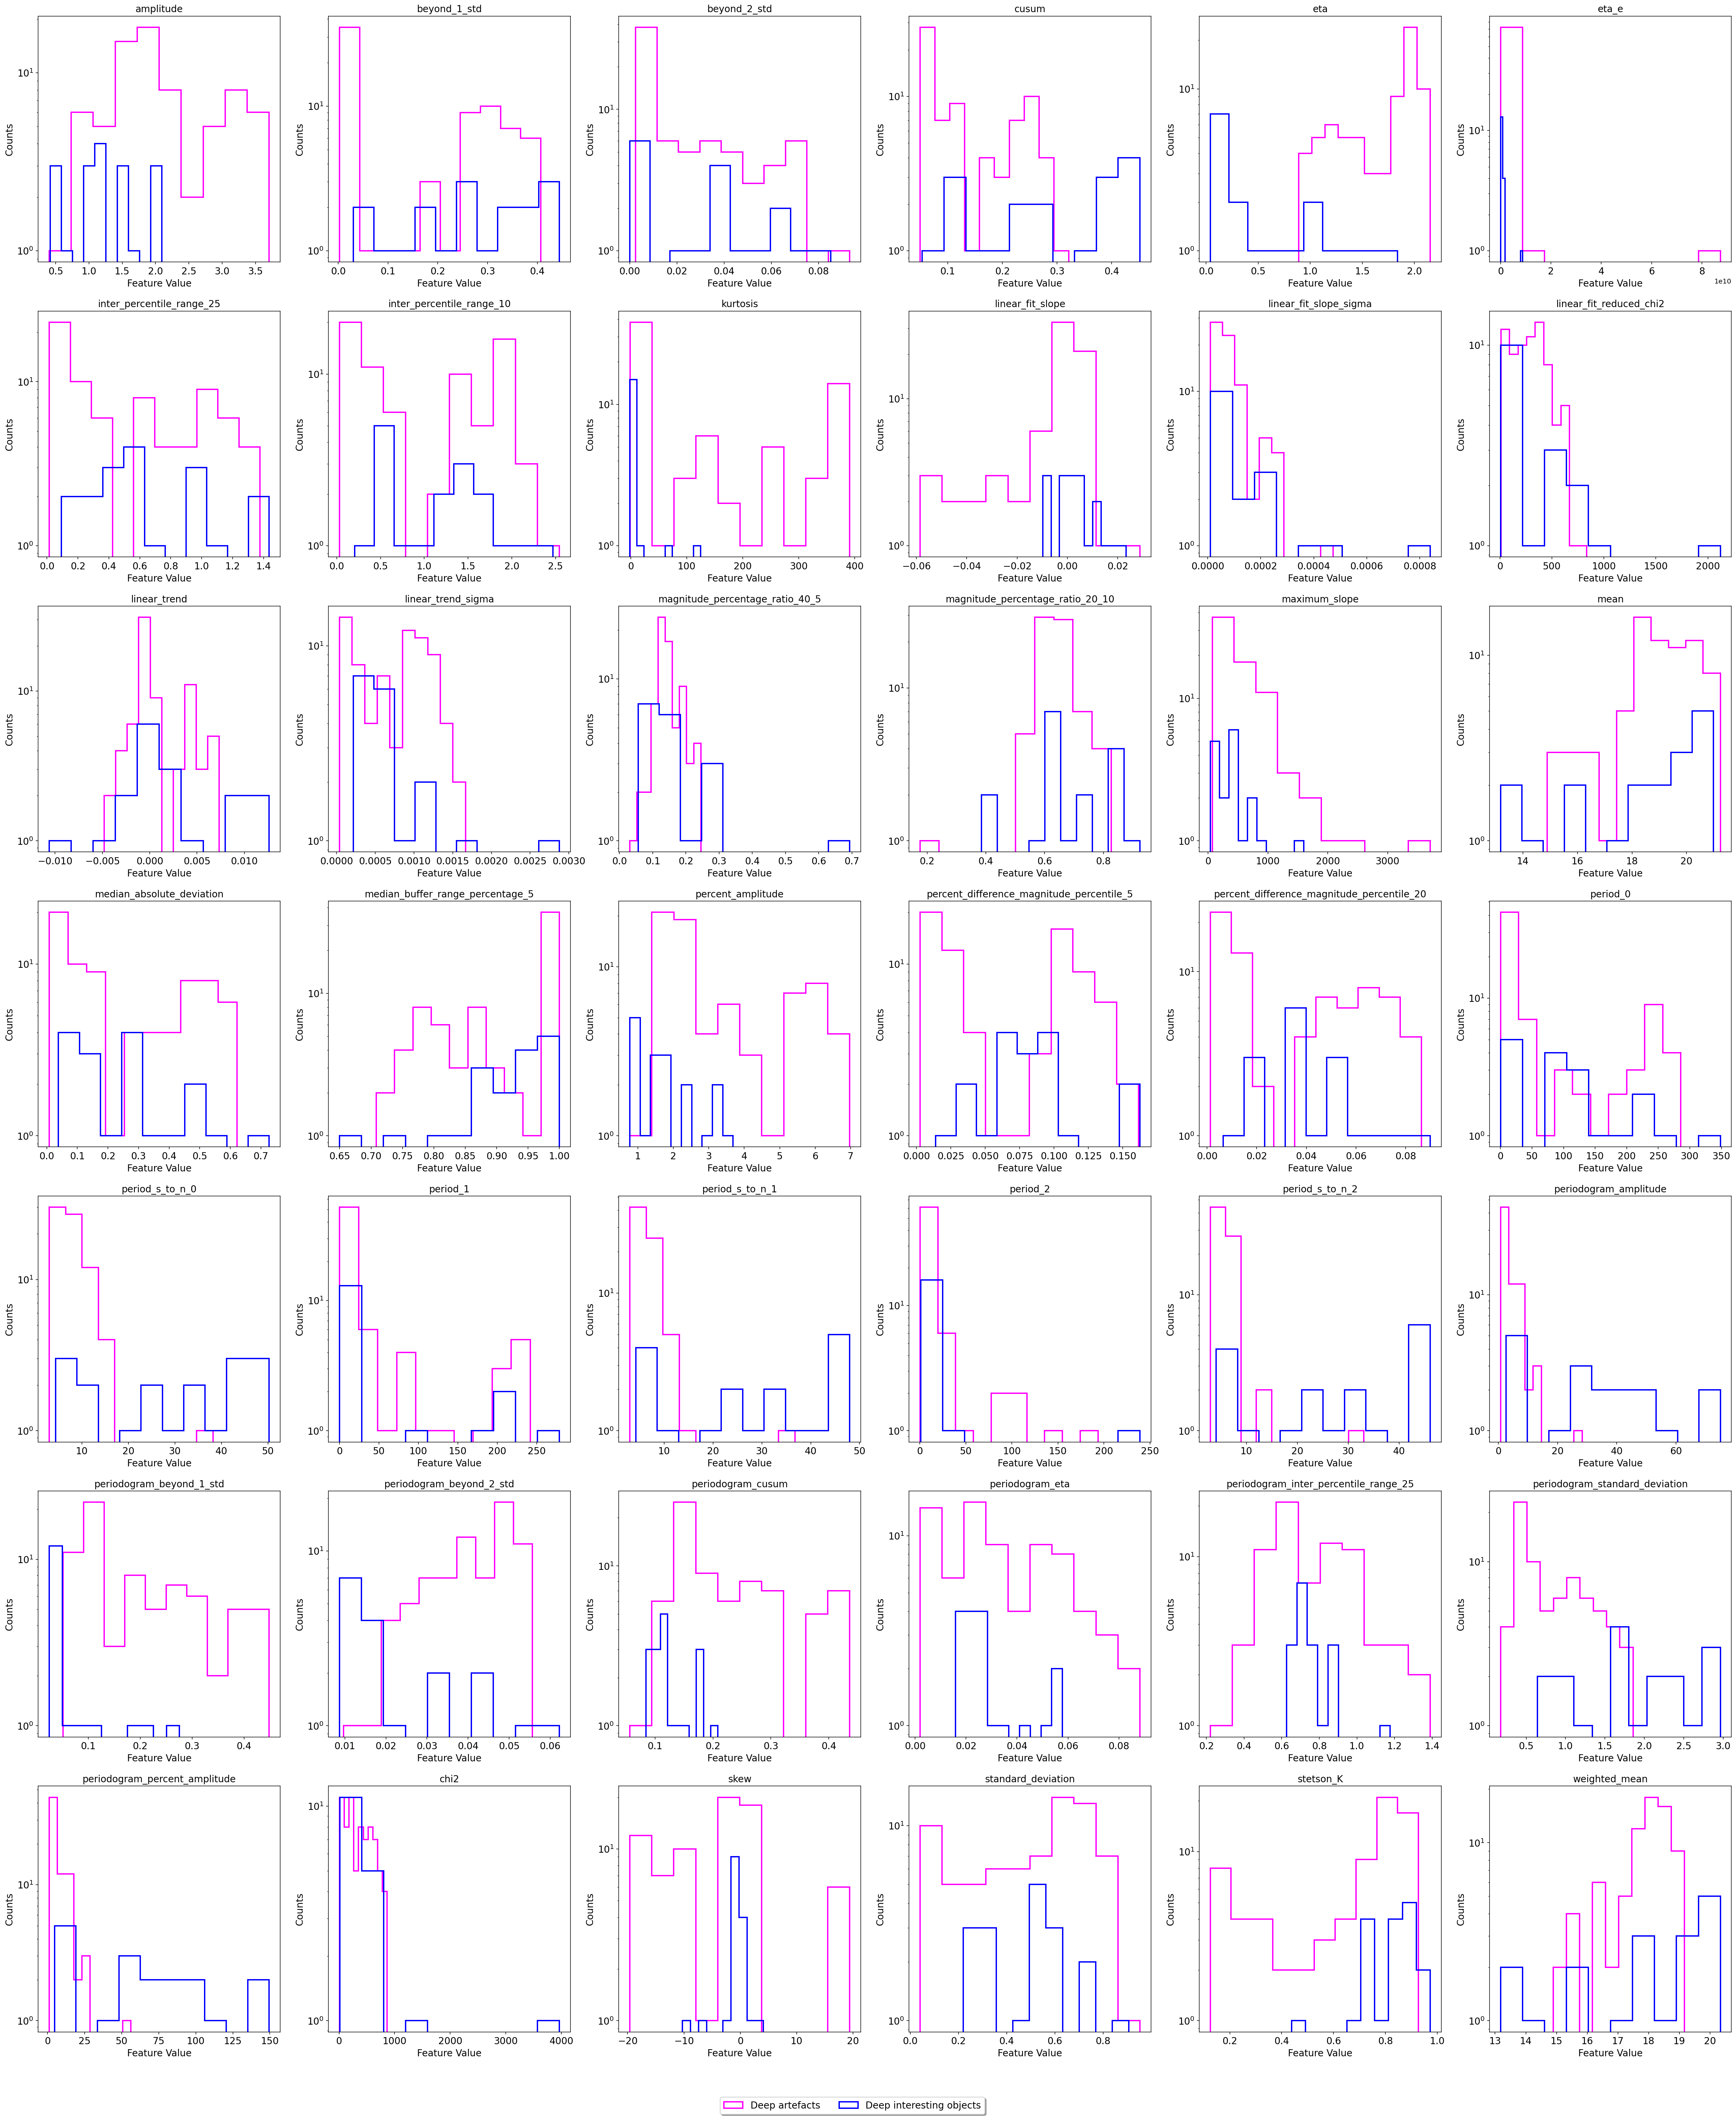

In [19]:
fig = plt.figure(figsize=(45, 55))

for i, f in enumerate(m31_names):
    ax = fig.add_subplot(7, 6, i+1) #42 features

    plt.hist(deep_artefacts['{}'.format(f)], histtype='step', color='magenta', linewidth=2, label='Deep artefacts')
    plt.hist(deep_interesting['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep interesting objects')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(-3.2, -0.3), ncol=2, fancybox=True, shadow=True, fontsize=14)

fig.tight_layout()
#fig.savefig('../figs/histograms/all_features_histogram_with_anomalies.png', format='png', bbox_inches='tight', dpi=400)